## 'The Hospital' (Masked) - Hypothesis Testing

### About 'The Hospital' 

'The Hospital' was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, 'The Hospital' is acclaimed for pioneering the private healthcare revolution in the country.

### Problem statement

The company wants to know:
- Which variables are significant in predicting the reason for hospitalization for different regions.
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the dataset
df = pd.read_csv("The_Hospital.csv")
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### Basic data exploration

In [3]:
# Structure of data(rows and columns)
df.shape

(1338, 8)

In [4]:
# Columns in data
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [5]:
# Characteristics of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [6]:
# Unique attributes for each column
df.nunique()

Unnamed: 0                 1338
age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [7]:
# Statistical information for data
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [8]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
# Check for null values in data
df.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

### Obsevation

- This data contains 1338 rows and 8 columns.
- There are no missing values in the data.
- There is one column that is unwanted and needs to be dropped.
- There are 4 categorical columns which include sex, smoker, region, and severity level.
- There are 3 continuous columns which include age, viral load, and hospitalization charges.
- The ages of these individuals range from 18 to 64 years, with an average of 39.2 years.
- The hospitalization charges for these individuals range from 2805 to 159426, with an average of 33176.

### Dropping of unwanted column

In [10]:
# Dropping of unwanted column
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


### Co-relation and distribution of data

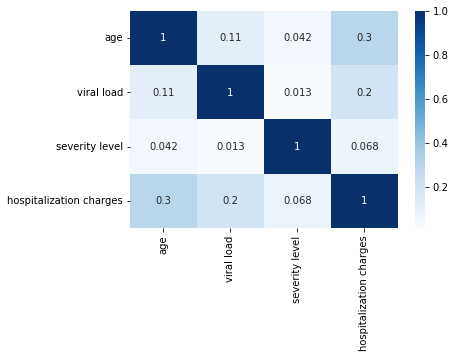

In [11]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

### Observation

- Age and viral load show some relation to hospitalization charges.

### Outlier detection using Inter-Quartile Range(IQR) method

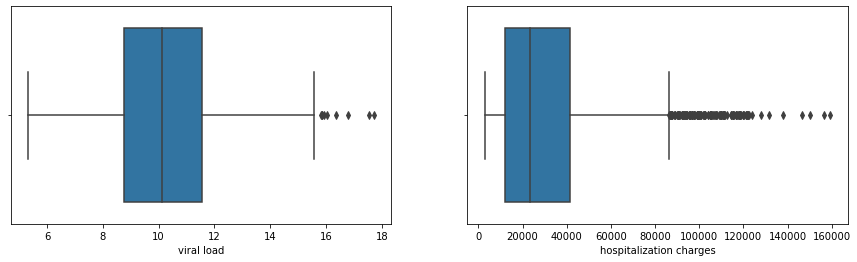

In [12]:
# Boxplot to detect outliers
fig, axis = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x=df['viral load'], ax=axis[0])
sns.boxplot(x=df['hospitalization charges'], ax=axis[1])
plt.show()

In [13]:
# calculate the IQR for viral load
q1 = df['viral load'].quantile(0.25)
q3 = df['viral load'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for viral load variable is:',(round(lower_limit,2), round(upper_limit,2)))

Lower and Upper limits for viral load variable is: (4.55, 15.78)


In [14]:
# calculate the IQR for hospitalization charges
q1 = df['hospitalization charges'].quantile(0.25)
q3 = df['hospitalization charges'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for casual variable is:',(round(lower_limit,2), round(upper_limit,2)))

Lower and Upper limits for casual variable is: (-32771.75, 86222.25)


### Observation

- As per the Inter-Quartile range method, the values greater than the upper limit are considered as outliers.
- An outlier in a medical dataset may indicate a rare disease or a unique response to treatment that could provide important information for medical research.
- Removing outliers from the data may therefore result in a biased or incomplete analysis of the data.

### Univariate analysis

In [15]:
# Value counts for categorical variables
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

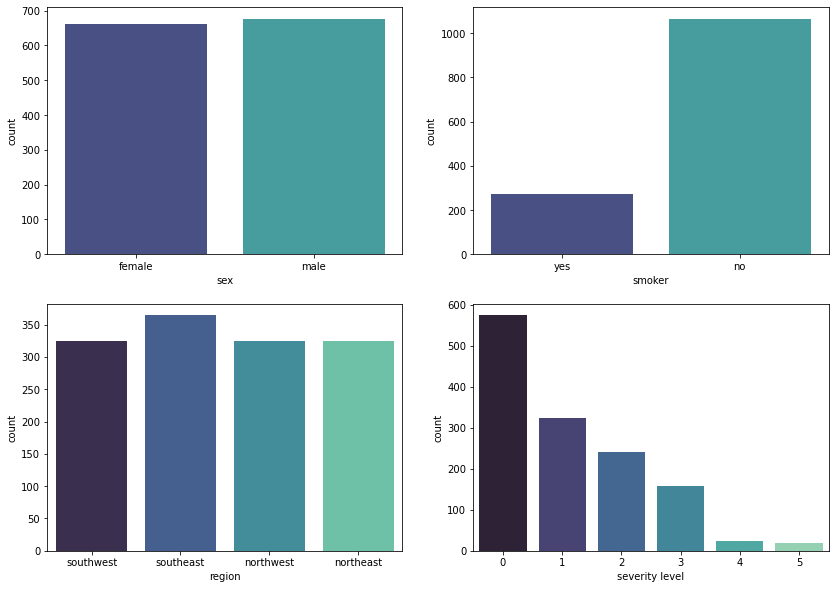

In [19]:
# Univariate analysis for categorical variables
fig, axis = plt.subplots(2,2,figsize=(14,10))
sns.countplot(x=df['sex'], palette = "mako", ax=axis[0,0])
sns.countplot(x=df['smoker'], palette = "mako", ax=axis[0,1])
sns.countplot(x=df['region'], palette = "mako", ax=axis[1,0])
sns.countplot(x=df['severity level'], palette = "mako", ax=axis[1,1])
plt.show()

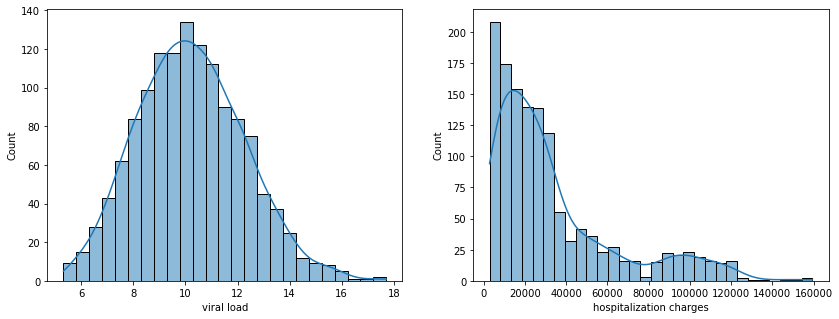

In [20]:
# Distribution for continuous variables
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.histplot(x=df['viral load'], kde=True, ax=axis[0])
sns.histplot(x=df['hospitalization charges'], kde=True, ax=axis[1])
plt.show()

### Observation

- There were more males (676) than females (662) in the dataset.
- There were more non-smokers (1064) than smokers (274) in the dataset.
- The dataset had a roughly equal number of individuals from four different regions: southeast (364), southwest (325), northwest (325), and northeast (324).
- The severity level variable had six possible values, ranging from 0 to 5. The most common severity level was 0 (574), followed by level 1 (324), level 2 (240), level 3 (157), level 4 (25), and level 5 (18).
- The histplot for the continuous variable viral load shows that it is normally distributed.
- The histplot for the continuous variable hospitalization charges follows a right-skewed distribution.

### Bivariate analysis

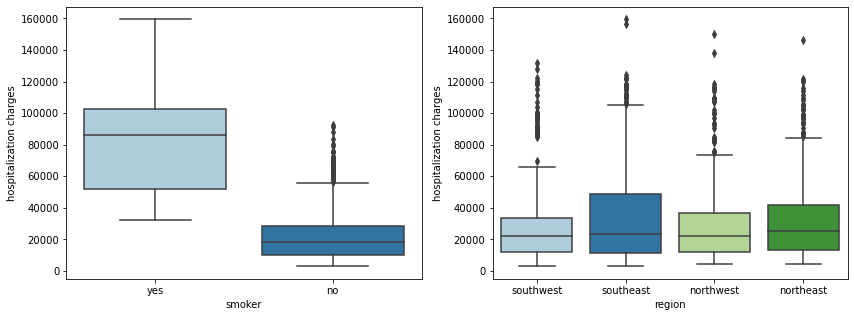

In [21]:
# Relation of hospitalization charges with smoker and region
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['smoker'], y=df['hospitalization charges'], palette='Paired', ax=axis[0])
sns.boxplot(x=df['region'], y=df['hospitalization charges'], palette='Paired', ax=axis[1])
plt.show()

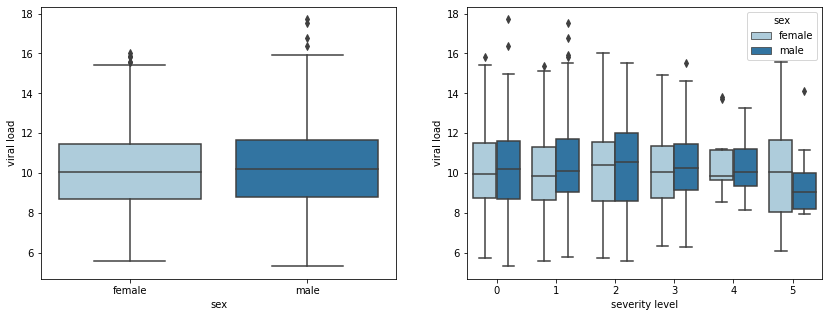

In [22]:
# Relation of hospitalization charges with sex and severity level
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['sex'], y=df['viral load'], palette='Paired', ax=axis[0])
sns.boxplot(x=df['severity level'], y=df['viral load'], hue=df['sex'], palette='Paired', ax=axis[1])
plt.show()

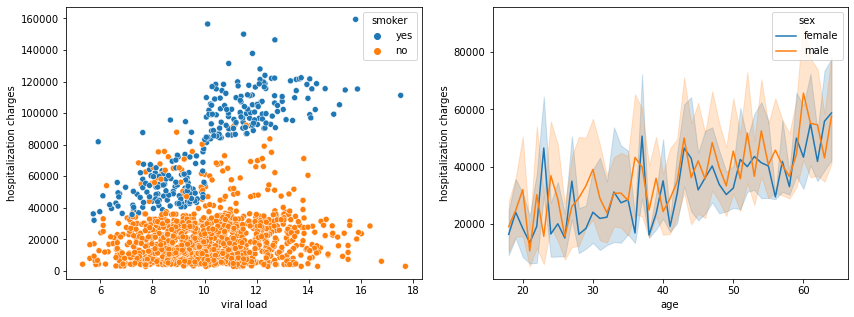

In [23]:
# Relationship with viral load and age for hospitalization charges
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(x=df['viral load'], y=df['hospitalization charges'], hue=df['smoker'], ax=axis[0])

sns.lineplot(x=df['age'], y=df['hospitalization charges'], hue=df['sex'], ax=axis[1])
plt.show()


### Observation

- Smokers tend to have higher hospitalization charges than non-smokers.
- There is no significant difference in hospitalization charges across all regions.
- The viral load for males and females is similar.
- Viral load for females with severity levels 0,1 and 2 seems to be little similar.
- As age rises, hospitalization charges increase as well.

### Are hospitalization charges of people who do smoking are greater than those who don't?

- To prove this statistically we can perform T-test Right tailed where,
- Null Hypothesis (H0): There is no significant difference in hospitalization charges between smokers and non-smokers.
- Alternate Hypothesis (H1): Smokers tend to have higher hospitalization charges than non-smokers.

In [24]:
from scipy.stats import ttest_ind

# select data for smokers and non-smokers
smokers = df[df['smoker'] == 'yes']['hospitalization charges'].sample(274)
non_smokers = df[df['smoker'] == 'no']['hospitalization charges'].sample(274)

# perform t-test
t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)

if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

t-statistic:  29.346736231235607
p-value:  1.1910456493295115e-103
Reject null hypothesis


### Observation

- From this test we can conclude that the smokers tend to have higher hospitalization charges than non-smokers.

### Is there any statistical evidence that the viral load of females is different from that of males?

- To prove this statistically we can perform T-test two tailed where,
- Null Hypothesis (H0): The mean viral load of females is equal to the mean viral load of males.
- Alternate Hypothesis (H1): The mean viral load of females is different from the mean viral load of males.

In [25]:
from scipy.stats import ttest_ind

# data for females and males with viral load
females = df[df['sex'] == 'female']['viral load'].sample(662)
males = df[df['sex'] == 'male']['viral load'].sample(662)

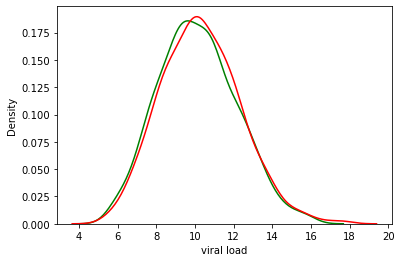

In [26]:
# kde plot for females and males
sns.kdeplot(females, color='green')
sns.kdeplot(males, color= 'red')
plt.show()

In [27]:
# perform t-test
t_stat, p_value = ttest_ind(females, males, alternative='two-sided')

# print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

t-statistic: -1.492016346314719
p-value: 0.13593344381665695
Fail to reject null hypothesis


### Observation

- From this test we can conclude that the mean viral load of females is equal to the mean viral load of males.

### Is the proportion of smoking significantly different across different regions?

- To prove this statistically we can perform Chi-square test where,
- Null Hypothesis (H0): The proportion of smoking is the same across all regions.
- Alternative Hypothesis (H1): The proportion of smoking is significantly different across the regions.

In [28]:
# creating the contingency table has it satisfies the assumptions
contingency_table = pd.crosstab(df['smoker'], df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


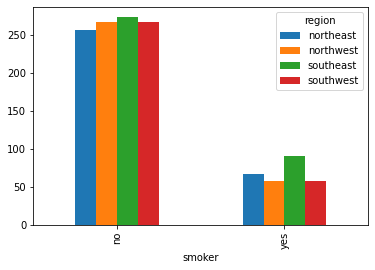

In [29]:
# bar plot for smokers in every region
contingency_table.plot(kind='bar')
plt.show()

In [30]:
import scipy.stats as stats

# perform chi2_contingency
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

# print results
print("chi2_stat:", chi2_stat)
print("p-value:", p_value)
print("dof:", dof)
print("expected_freq:", expected_freq)

if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

chi2_stat: 7.34347776140707
p-value: 0.06171954839170547
dof: 3
expected_freq: [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]
Fail to reject null hypothesis


### Observation

- From this test we can conclude that the proportion of smoking is significantly different across the regions.

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

### Shapiro-wilk test to check normality

In [31]:
# data for females
female_df = df[df['sex']=='female']
female_df['severity level'].value_counts()[:3]

0    289
1    158
2    119
Name: severity level, dtype: int64

In [32]:
data = female_df[(female_df['severity level']==0) | (female_df['severity level']==1) | (female_df['severity level']==2)]['viral load']

- Null Hypothesis (H0): Viral load follows normal distribution
- Alternate Hypothesis (H1): Viral load does not follows normal distribution

In [33]:
import scipy.stats as stats

# perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# print results
print("statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Viral load does not follows normal distribution")
else:
    print("Viral load follows normal distribution")

statistic: 0.993152916431427
p-value: 0.011093495413661003
Viral load does not follows normal distribution


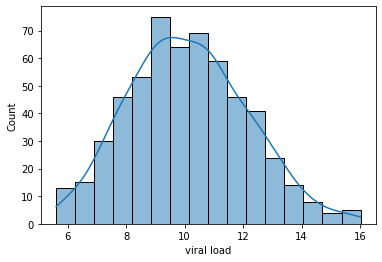

In [34]:
# Histogram to check normality
sns.histplot(data, kde=True)
plt.show()

### Observation

- The above histplot shows the normal distribution curve for a viral load which satisfies the ANNOVA normality assumption.

### Levene's test to check the equal variances

- Null Hypothesis (H0): The variances are equal
- Alternate Hypothesis (H1): The variances are not equal

In [35]:
# creating groups for severity levels
severity_level_0 = female_df[female_df['severity level']==0]['viral load'].sample(119)
severity_level_1 = female_df[female_df['severity level']==1]['viral load'].sample(119)
severity_level_2 = female_df[female_df['severity level']==2]['viral load'].sample(119)

In [36]:
# perform Levene's test for homogeneity of variances
statistic, p_value = stats.levene(severity_level_0, severity_level_1, severity_level_2)

# print results
print("statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The variances are not equal")
else:
    print("The variances are equal")

statistic: 0.958046870641876
p-value: 0.3846338710275178
The variances are equal


### ANNOVA test to check mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level

- To prove this statistically we can perform ANNOVA test where,
- Null Hypothesis (H0): The mean viral load among women with 0 Severity level, 1 Severity level, and 2 Severity level is the same.
- Alternate Hypothesis (H1): The mean viral load among women with 0 Severity level, 1 Severity level, and 2 Severity level is different.

In [37]:
from scipy.stats import f_oneway

# perform f_oneway ANNOVA test
f_statistic, p_value = f_oneway(severity_level_0, severity_level_1, severity_level_2)

# print results
print("f_statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

f_statistic: 0.4916586887928707
p-value: 0.612028087773749
Fail to reject null hypothesis


### Observation

- From this test we can conclude that the mean viral load among females with 0 Severity level, 1 Severity level, and 2 Severity level is the same.

### Business Insights

From the visual and statistical analysis we can say that:
- Smokers tend to have higher hospitalization charges than non-smokers.
- There is no significant difference in hospitalization charges across all regions.
- The viral load for males and females is similar.
- Severity level has no effect on hospitalization charges.
- Viral load for females with severity levels 0,1 and 2 seems to be similar.
- As age rises, hospitalization charges increase as well.

### Solution for the problem statement

- Which variables are significant in predicting the reason for hospitalization for different regions?
    - smoker, age, viral load and severity level are variables that are significant in predicting the reason for hospitalization for different regions.


- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges?
    - The viral load for males and females is similar which has no effect on hospitalization charges.
    - Smoking tend to have an effect on hospitalization charges.
    - Severity level seems to have no effect on hospitalization charges.
    - Age has effect on hospitalization charges.
    

### Recommendations

- Smoking seems to be a significant predictor of higher hospitalization charges, indicating that healthcare providers could benefit from targeting smoking cessation programs for patients who smoke to reduce healthcare costs.

- There is no significant difference in hospitalization charges across different regions, indicating that healthcare providers in all regions may be providing similar levels of care.

- Age and viral load show a positive correlation with hospitalization charges, which means that healthcare providers may need to pay more attention to elderly patients or patients with high viral load.

- Right-skewed hospitalization charges suggest that some patients could have very high hospitalization costs. Therefore, it is crucial to have adequate insurance coverage to help cover these costs.

- With the help of insurance providers, hospitals can develop programs and incentives to encourage patients to adopt healthy habits. These include programs that reward patients who quit smoking, exercise regularly, or achieve certain health goals.